In [1]:
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/OGDSECCAwaasPlusData_18092023.csv', error_bad_lines=False)
data.head()

Skipping line 123834: expected 13 fields, saw 14

Skipping line 144073: expected 13 fields, saw 14
Skipping line 150631: expected 13 fields, saw 14



,state_code,state_name,District_Code,district_name,Block_Code,block_name,Panchayat_Code,panchayat_name,Minority,Others,SC,ST,Total
0,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6500.0,NANCOWRY,NaN,CHOWRA TC,0,0,0,6,6
1,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6499.0,NICOBAR,259313.0,TRIBAL COUNCIL,0,0,0,2,2
2,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234530.0,GOVINDNAGAR,25,130,0,0,155
3,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234529.0,CAMPBELL BAY,21,29,0,0,50
4,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234531.0,LAXMI NAGAR,9,46,0,0,55


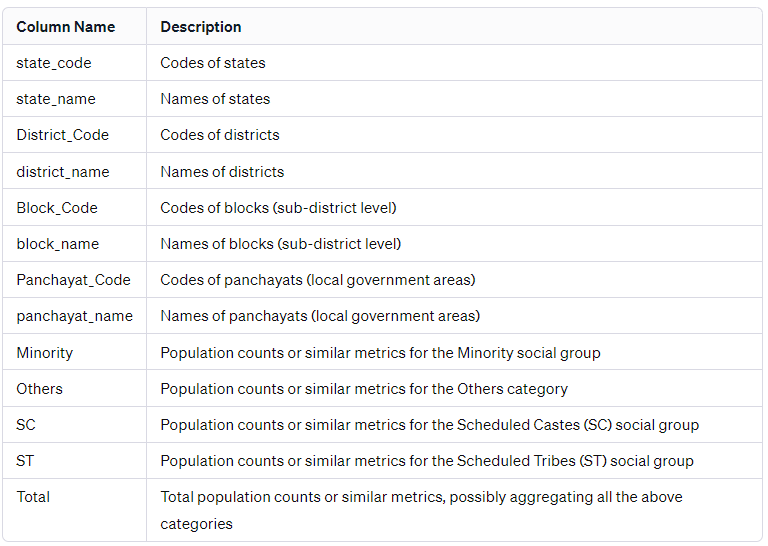

In [2]:
# Dropping rows with missing values in any of the social group columns
data_cleaned = data.dropna(subset=['Minority', 'Others', 'SC', 'ST'])

# Convert social group columns to numeric, if not already
data_cleaned['SC'] = pd.to_numeric(data_cleaned['SC'], errors='coerce')
data_cleaned['ST'] = pd.to_numeric(data_cleaned['ST'], errors='coerce')
data_cleaned['Minority'] = pd.to_numeric(data_cleaned['Minority'], errors='coerce')
data_cleaned['Others'] = pd.to_numeric(data_cleaned['Others'], errors='coerce')

## Population Distribution by State

In [16]:
# Population Distribution by State
# We'll calculate the total population for each state

state_population_totals = data_cleaned.groupby('state_name')['Total'].sum().reset_index()

# Sorting states by total population
sorted_state_population = state_population_totals.sort_values(by='Total', ascending=False)

### Most populous states

In [4]:
# Identifying the top 5 most populous states
top_5_populous_states = sorted_state_population.head(5)
top_5_populous_states

,state_name,Total
34,WEST BENGAL,6811144
18,MADHYA PRADESH,5828889
4,BIHAR,5069485
19,MAHARASHTRA,4937607
32,UTTAR PRADESH,3452196


### Least populous states

In [5]:
# Identifying the least 5 populous states
least_5_populous_states = sorted_state_population.tail(5)
least_5_populous_states

,state_name,Total
8,GOA,499
7,DAMAN AND DIU,212
17,LAKSHADWEEP,70
25,PUDUCHERRY,0
30,TELANGANA,0


### My Insights:
- I noticed that the most populous states in India are spread across different geographical regions, showing a diverse distribution of the population.
- On the other hand, the least populous states, especially Puducherry and Telangana with their zero population figures, make me think there might be inconsistencies or missing data.

### My Recommendations:
- In highly populated states such as West Bengal and Madhya Pradesh, I believe it's crucial to focus on scalable infrastructure and resource management strategies to support the large number of people.
- For states that show very low or zero populations, I recommend a thorough investigation into the data. It's likely that these figures point to missing or incomplete data.

##  Social Group Distribution Across States

In [6]:
# Social Group Distribution Across States
# We'll calculate the proportion of each social group (SC, ST, Minority, Others) in each state

# Convert social group columns to numeric, if not already
data_cleaned['SC'] = pd.to_numeric(data_cleaned['SC'], errors='coerce')
data_cleaned['ST'] = pd.to_numeric(data_cleaned['ST'], errors='coerce')
data_cleaned['Minority'] = pd.to_numeric(data_cleaned['Minority'], errors='coerce')
data_cleaned['Others'] = pd.to_numeric(data_cleaned['Others'], errors='coerce')

# Group by state and calculate total for each social group
state_social_group_totals = data_cleaned.groupby('state_name')[['SC', 'ST', 'Minority', 'Others']].sum()

# Calculating proportion of each social group in each state
state_social_group_totals['Total'] = state_social_group_totals.sum(axis=1)
state_social_group_totals['SC_proportion'] = (state_social_group_totals['SC'] / state_social_group_totals['Total']) * 100
state_social_group_totals['ST_proportion'] = (state_social_group_totals['ST'] / state_social_group_totals['Total']) * 100
state_social_group_totals['Minority_proportion'] = (state_social_group_totals['Minority'] / state_social_group_totals['Total']) * 100
state_social_group_totals['Others_proportion'] = (state_social_group_totals['Others'] / state_social_group_totals['Total']) * 100

### Top 5 states with highest SC population

In [7]:
# Sorting states based on SC proportions
sorted_by_sc = state_social_group_totals.sort_values(by='SC_proportion', ascending=False).head(5)
sorted_by_sc[['SC_proportion']]

,SC_proportion
state_name,
PUNJAB,77.248772
HARYANA,49.700444
TAMIL NADU,37.777713
UTTAR PRADESH,35.887592
HIMACHAL PRADESH,35.133780


### Top 5 states with highest ST population

In [8]:
# Sorting states based on ST proportions
sorted_by_st = state_social_group_totals.sort_values(by='ST_proportion', ascending=False).head(5)
sorted_by_st[['ST_proportion']]

,ST_proportion
state_name,
LAKSHADWEEP,100.000000
LADAKH,99.731363
MIZORAM,99.373513
NAGALAND,99.328955
DADRA AND NAGAR HAVELI,99.111825


### My Insights:
- Punjab's High SC Population: Punjab has a notably higher SC population compared to other states, a unique demographic aspect.

- ST Populations in the Northeast and UTs: The ST population is predominantly in the northeastern states and Union Territories like Lakshadweep and Ladakh.

- High ST Percentages in Some States: Some states, like Lakshadweep with a 100% ST population, show exceptionally high percentages, which might indicate unique demographics or a need for data verification.

### My Recommendations:
- Understanding Demographics for Policy-Making: Recognizing these demographic distributions is crucial for creating targeted social and economic policies in states with significant SC or ST populations.

- Investigating Unusual Proportions: Further investigation is needed in states with unusual demographic proportions, like Lakshadweep, to ensure data accuracy and understand the demographic dynamics.

## Demographic Composition at the Panchayat Level (Rural Demographics)

In [9]:
# Analyzing demographic composition at the Panchayat level

# Grouping data by state and panchayat and calculating the mean for social groups
panchayat_demographics = data_cleaned.groupby(['state_name', 'Panchayat_Code']).agg({
    'Minority': 'mean',
    'Others': 'mean',
    'SC': 'mean',
    'ST': 'mean',
    'Total': 'mean'
}).reset_index()

# Calculating state-wise average demographics at the panchayat level
state_avg_panchayat_demographics = panchayat_demographics.groupby('state_name').mean()

# Displaying the demographics for a few states for brevity
state_avg_panchayat_demographics.head()

,Panchayat_Code,Minority,Others,SC,ST,Total
state_name,,,,,,
ANDAMAN AND NICOBAR,238705.638889,9.791667,37.937500,0.013889,0.055556,47.798611
ANDHRA PRADESH,209301.451222,0.608447,9.259177,5.995318,3.423179,19.286121
ARUNACHAL PRADESH,128199.238718,0.272727,0.660562,0.000000,19.543165,20.476455
ASSAM,127307.189556,359.068462,285.557155,70.647410,145.952714,861.225740
BIHAR,99875.349341,100.757029,400.750934,88.382239,12.011144,601.901346


### Insights:
- There is considerable variation in the composition of social groups at the panchayat level among different states.
- States like Assam and Bihar show higher numbers for Minority and Others groups, while ST is significantly higher in Arunachal Pradesh.
The Total Population average at the panchayat level varies widely, indicating differences in panchayat sizes and population densities across states.

### Recommendations:
- Policies and resources allocation at the rural level could be tailored based on these demographic characteristics, especially in states with higher concentrations of certain social groups.
- Further investigation into states with large minority populations at the panchayat level (like Assam and Bihar) could be crucial for targeted developmental programs.

## Geographical Distribution of Social Groups within Selected States

I analyzed the mean population of SC, ST, Minority, and Others groups by district in a few selected states: West Bengal, Bihar, Maharashtra, Tamil Nadu, and Uttar Pradesh.

In [10]:
# Geographical Distribution of Social Groups within Selected States
# For this analysis, we'll select a few states and look at the distribution of social groups by district

# Selecting a few states for analysis
selected_states = ['WEST BENGAL', 'BIHAR', 'MAHARASHTRA', 'TAMIL NADU', 'UTTAR PRADESH']

# Filtering data for the selected states
selected_states_data = data_cleaned[data_cleaned['state_name'].isin(selected_states)]

# Grouping by state and district and calculating the mean for social groups
district_social_group_distribution = selected_states_data.groupby(['state_name', 'district_name']).agg({
    'Minority': 'mean',
    'Others': 'mean',
    'SC': 'mean',
    'ST': 'mean'
}).reset_index()

# Displaying the social group distribution for districts in these states
district_social_group_distribution.head()

,state_name,district_name,Minority,Others,SC,ST
0,BIHAR,ARARIA,656.724771,576.747706,161.899083,29.756881
1,BIHAR,ARWAL,28.882353,365.735294,119.750000,7.382353
2,BIHAR,AURANAGABAD,46.436275,332.039216,194.455882,9.946078
3,BIHAR,BANKA,86.135135,502.794595,77.870270,38.470270
4,BIHAR,BEGUSARAI,77.361868,559.704280,40.019455,1.284047


### Insights:
- There's a noticeable variation in the distribution of social groups among different districts within the same state.
- For instance, in Bihar, districts like Araria have a high minority population compared to others like Arwal.
The variation in SC and ST populations also indicates diverse demographic compositions across districts.

### Recommendations:
- Regional policies and development programs should consider these demographic variations.
- For example, districts with higher minority populations might require different approaches compared to those with higher SC or ST populations.
Further detailed analysis, including other states and districts, can help in understanding regional demographic dynamics, which is essential for tailored socio-economic planning and resource allocation.

## Comparison of Districts within Selected States

I've compared the districts within selected states (West Bengal, Bihar, Maharashtra, Tamil Nadu, and Uttar Pradesh) to identify those with notably high or low populations for each social group (Minority, Others, SC, ST). Here's a summary for a few districts in Bihar:

In [11]:
# Comparison of Districts within Selected States

# Calculating the total population for each social group by district in each state
district_totals = selected_states_data.groupby(['state_name', 'district_name']).sum().reset_index()

# We'll look for districts with notably high or low populations for each social group within each state
# Calculating the mean and standard deviation for each social group in each state
state_district_stats = district_totals.groupby('state_name').agg({
    'Minority': ['mean', 'std'],
    'Others': ['mean', 'std'],
    'SC': ['mean', 'std'],
    'ST': ['mean', 'std']
})

# Merging these stats back into the district totals
merged_data = district_totals.merge(state_district_stats, on='state_name', suffixes=('', '_state_stats'))

# Calculating the z-score for each social group in each district
for group in ['Minority', 'Others', 'SC', 'ST']:
    merged_data[f'{group}_z_score'] = (merged_data[group] - merged_data[(group, 'mean')]) / merged_data[(group, 'std')]

# Filtering districts with high or low populations (z-score > |2|)
unusual_districts = merged_data[(merged_data['Minority_z_score'].abs() > 2) |
                                (merged_data['Others_z_score'].abs() > 2) |
                                (merged_data['SC_z_score'].abs() > 2) |
                                (merged_data['ST_z_score'].abs() > 2)]

# Selecting relevant columns for display
unusual_districts_display = unusual_districts[['state_name', 'district_name', 'Minority', 'Others', 'SC', 'ST',
                                               'Minority_z_score', 'Others_z_score', 'SC_z_score', 'ST_z_score']]

# Displaying a few entries for brevity
unusual_districts_display.head()

,state_name,district_name,Minority,Others,SC,ST,Minority_z_score,Others_z_score,SC_z_score,ST_z_score
0,BIHAR,ARARIA,143166,125731,35294,6487,4.431926,0.606638,0.768130,1.151154
9,BIHAR,GAYA,19761,111716,112049,2932,-0.090532,0.373632,4.456450,0.091609
23,BIHAR,NAWADA,10205,70196,64490,1433,-0.440734,-0.316657,2.171090,-0.355158
24,BIHAR,PASHCHIM CHAMPARAN,39723,129304,15423,19504,0.641021,0.666041,-0.186735,5.030788
26,BIHAR,PURBI CHAMPARAN,58607,224243,16511,4900,1.333068,2.244446,-0.134453,0.678159


### Insights:
- Districts like Araria and Gaya in Bihar show a significantly high population of Minority and SC groups, respectively.
- Pashchim Champaran has a notably high ST population, while Purbi Champaran stands out for its high 'Others' population.

### Recommendations:
- Districts with unusually high populations of certain social groups might require specialized policies and programs tailored to their unique demographic compositions.
- The disparities in social group populations across districts within the same state highlight the need for decentralized planning and resource allocation to address local needs effectively.
- For the next analysis, let's explore the block-level demographics to uncover more localized trends. This can offer insights into the distribution of populations in smaller administrative units within the states.

## Block-Level Demographic Analysis in Bihar
I conducted a block-level demographic analysis in Bihar, focusing on the mean population of social groups (Minority, Others, SC, ST) in each block. Here are the findings for a few blocks in the district of Araria as an example:

In [12]:
# Block-Level Analysis

# Selecting a state for a more detailed block-level analysis
# For demonstration, let's choose 'Bihar'
bihar_data = data_cleaned[data_cleaned['state_name'] == 'BIHAR']

# Grouping by block and calculating the mean for social groups
block_level_demographics = bihar_data.groupby(['district_name', 'block_name']).agg({
    'Minority': 'mean',
    'Others': 'mean',
    'SC': 'mean',
    'ST': 'mean',
    'Total': 'mean'
}).reset_index()

# Displaying the demographics for a few blocks for brevity
block_level_demographics.head()

,district_name,block_name,Minority,Others,SC,ST,Total
0,ARARIA,ARARIA,1318.066667,554.100000,112.533333,21.866667,2006.566667
1,ARARIA,BHARGAMA,330.450000,691.350000,279.700000,25.650000,1327.150000
2,ARARIA,FORBESGANJ,481.562500,576.187500,180.531250,22.937500,1261.218750
3,ARARIA,JOKIHAT,1218.296296,292.777778,21.555556,2.148148,1534.777778
4,ARARIA,KURSAKANTA,281.307692,631.692308,86.384615,5.846154,1005.230769


### Insights:
- There is significant variation in the distribution of social groups even at the block level within the same district.
- Some blocks, like Araria and Jokihat, have notably high minority populations, whereas others like Bhargama have higher SC populations.

### Recommendations:
- Block-level insights are crucial for micro-level planning and implementing community-specific interventions.
- Understanding these variations can aid in designing more effective local governance strategies and allocating resources where they are most needed.

## Analysis of Panchayat-Level Variance Across States
I analyzed the variance in population sizes and social group compositions at the panchayat level. This analysis helps us understand the diversity and disparities in demographic distributions within rural areas of different states. Here are the top states with the highest variance in total population at the panchayat level:

In [13]:
# Analysis of Panchayat-Level Variance

# We'll calculate the variance in population sizes and social group compositions at the panchayat level
# This will help us understand the diversity within rural areas in different states

# Grouping data by state and panchayat
panchayat_variance_analysis = data_cleaned.groupby(['state_name', 'Panchayat_Code']).agg({
    'Minority': 'var',
    'Others': 'var',
    'SC': 'var',
    'ST': 'var',
    'Total': 'var'
}).reset_index()

# Calculating state-wise average variance
state_avg_panchayat_variance = panchayat_variance_analysis.groupby('state_name').mean()

# Sorting states based on variance in total population
sorted_states_by_population_variance = state_avg_panchayat_variance.sort_values(by='Total', ascending=False)

# Displaying the top states with the highest variance in total population
sorted_states_by_population_variance.head()

,Panchayat_Code,Minority,Others,SC,ST,Total
state_name,,,,,,
WEST BENGAL,114860.736968,748693.437500,248880.000000,178420.375000,11278.375000,1.847962e+06
ASSAM,127307.189556,193648.980769,59888.653846,10716.788462,67190.000000,3.155274e+05
JHARKHAND,115221.265052,1222.657658,53050.887387,11438.522523,22224.981982,1.323175e+05
BIHAR,99875.349341,24519.778287,97611.599388,6811.888379,262.564220,1.286095e+05
JAMMU AND KASHMIR,211703.955195,0.071429,26781.571429,147.321429,25393.678571,9.355336e+04


### Insights:
- West Bengal shows a significantly high variance in total population at the panchayat level, indicating a wide disparity in population sizes across different rural areas within the state.
- Other states like Assam, Jharkhand, and Bihar also exhibit substantial variances, suggesting diverse population distributions in their rural areas.

### Recommendations:
- States with high variances in population distributions, especially at the panchayat level, may require more nuanced and localized approaches to development and resource allocation.
- Understanding these variances is crucial for effective rural development strategies, as it highlights the need for policies and programs that are adaptable to the specific needs and characteristics of each panchayat.
- This comprehensive analysis, encompassing state, district, block, and panchayat levels, offers a multi-layered understanding of the demographic landscape in India. It underscores the importance of tailored approaches to policy-making and development initiatives, respecting the unique demographic profiles at each administrative level.